In [1]:
import pandas as pd
import numpy as np

_m = pd.read_pickle('moonshot_submissions.p')

moonshot = _m.loc[_m.okay][['CID (canonical)','CID_group', 'old_index', 'clean_creator', 'SMILES', 'new_smiles',
                           'fragments', 'xcode', 'Structure ID', 'xcode','site_name', 'pdb_entry',
                            'ORDERED', 'MADE', 'ASSAYED', 'in_fragalysis',
                            'IC50', 'pIC50',
                           'submission_date', 'inferred_submission_date', 'order_date', 'shipment_date', 
                           'description', 'initial_screen',
                           'N_creator_submission', 'N_submission_group', 'resubmitted',
                           'Enamine - REAL Space', 'Enamine - Extended REAL Space',
                           'Enamine - SCR', 'Enamine - BB', 'Mcule', 'Mcule Ultimate',
                           'N_chars', 'N_words', 'N_words_cutoff', 'classified_method', 'flesch',
                           'dale_chall', 'okay']]

del _m

## Creator summary
Dec 2020 filtered
w/o Matt & Nir

In [23]:
from pivot_creators import pivot_creators, add_suffix
from datetime import datetime


date_cutoff = datetime(2020, 8, 1)
# nan < n is false.
predate_filter = (moonshot.inferred_submission_date < date_cutoff) & ~(moonshot.order_date > date_cutoff)
creators = pivot_creators(moonshot.loc[predate_filter])
creators = creators.rename(columns={k: k+' (2020)' for k in creators.columns})
creators.to_csv('creators_Aug.csv')
creators.head(20).round(1)

,N submissions (2020),N made (2020),N assayed (2020),N crystallised (2020),Mdn shipment date (2020),Mdn N words (2020),Gmean IC50 (2020),Min IC50 (2020),made-over-submitted % (2020),crystal-over-made % (2020),N IC50 ≤ 50 µM (2020),N IC50 ≤ 20 µM (2020),N IC50 ≤ 1 µM (2020),N IC50 ≤ 0.1 µM (2020),sub50-over-assayed % (2020)
Aaron Morris,81,52,3,39,2021-04-16 00:00:00,17,37.8,37.8,64±5%,75±6%,1,0,0,0,33±27%
DSi-Poised Library,40,34,1,34,2020-02-01 00:00:00,12,NaN,NaN,85±6%,100±0%,0,0,0,0,0±0%
Nir London,276,182,53,22,2020-05-13 00:00:00,15,8.7,0.5,66±3%,12±2%,14,11,1,0,26±6%
Matthew Robinson,374,115,51,20,2020-06-16 00:00:00,28,69.3,16.4,31±2%,17±4%,4,1,0,0,8±4%
Ed Griffen,69,37,25,18,2020-07-29 00:00:00,20,31.7,0.3,54±6%,49±8%,9,5,2,0,36±10%
Jan Hullaert,137,36,11,18,2020-06-10 00:00:00,18,29.3,8.3,26±4%,50±8%,6,4,0,0,55±15%
Bart Lenselink,169,79,3,13,2020-04-27 00:00:00,36,46.2,35.7,47±4%,16±4%,1,0,0,0,33±27%
Tryfon Zarganis,65,24,12,13,2020-04-17 00:00:00,52,26.9,3.6,37±6%,54±10%,7,4,0,0,58±14%
Alpha Lee,91,39,32,10,2020-08-05 00:00:00,5,20.1,0.0,43±5%,26±7%,13,12,2,1,41±9%
Benjamin Perry,82,34,18,9,2020-06-24 00:00:00,44,34.1,7.6,41±5%,26±8%,6,4,0,0,33±11%


In [83]:
from pivot_creators import pivot_creators, add_suffix
from datetime import datetime


date_cutoff = datetime(2021, 1, 1)
# nan < n is false.
predate_filter = (moonshot.inferred_submission_date < date_cutoff) & ~(moonshot.shipment_date > date_cutoff) & ~moonshot.initial_screen
creators = pivot_creators(moonshot.loc[predate_filter])
creators = creators.rename(columns={k: k+' (2020)' for k in creators.columns})
creators.to_csv('creators_2020.csv')
creators.head(10).round(1)

,N submissions (2020),N made (2020),N assayed (2020),N crystallised (2020),Mdn shipment date (2020),Mdn N words (2020),Gmean IC50 (2020),Min IC50 (2020),made-over-submitted % (2020),crystal-over-made % (2020),N IC50 ≤ 50 µM (2020),N IC50 ≤ 20 µM (2020),N IC50 ≤ 1 µM (2020),N IC50 ≤ 0.1 µM (2020),sub50-over-assayed % (2020)
Matthew Robinson,488,199,135,44,2020-09-01 00:00:00,15,12.5,0.1,41±2%,22±3%,50,37,9,0,37±4%
Alpha Lee,363,207,192,23,2020-10-01 00:00:00,5,20.8,0.0,57±3%,11±2%,29,24,6,1,15±3%
Nir London,368,269,138,22,2020-05-20 00:00:00,13,14.2,0.5,73±2%,8±2%,14,11,1,0,10±3%
Ed Griffen,358,62,50,21,2020-08-26 00:00:00,19,34.5,0.2,17±2%,34±6%,15,9,4,0,30±6%
Jan Hullaert,137,36,11,18,2020-06-10 00:00:00,18,29.3,8.3,26±4%,50±8%,6,4,0,0,55±15%
Bart Lenselink,169,79,3,13,2020-04-27 00:00:00,36,46.2,35.7,47±4%,16±4%,1,0,0,0,33±27%
Tryfon Zarganis,65,24,12,13,2020-04-17 00:00:00,52,26.9,3.6,37±6%,54±10%,7,4,0,0,58±14%
Benjamin Perry,131,32,16,10,2020-06-24 00:00:00,39,22.3,0.6,24±4%,31±8%,9,7,1,0,56±12%
Peter Kenny,67,12,12,9,2020-10-03 12:00:00,99,7.8,0.3,18±5%,75±12%,9,9,1,0,75±12%
Daren Fearon,681,25,8,8,2020-04-27 00:00:00,12,15.5,2.8,4±1%,32±9%,4,3,0,0,50±18%


PearsonRResult(statistic=0.42498654900868044, pvalue=0.003614058723585968)


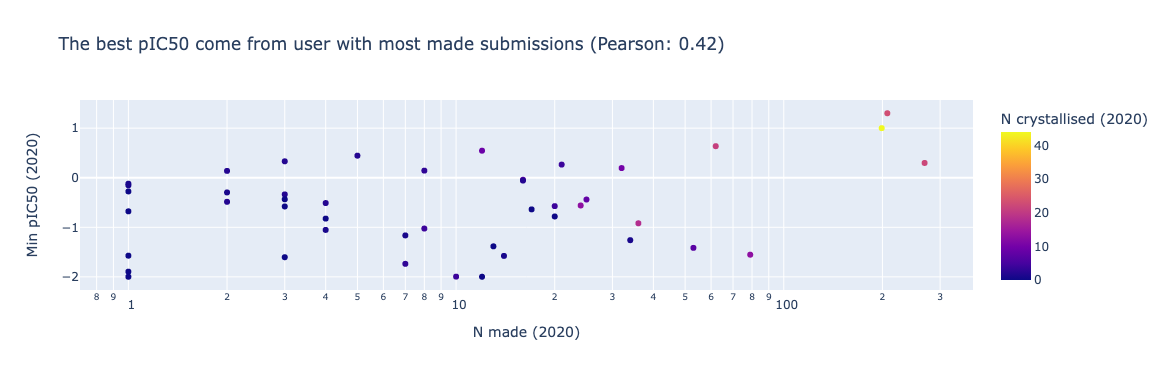

In [16]:
# IC50
import plotly.express as px
from scipy.stats import pearsonr

creators['name'] = creators.index
creators['Min pIC50 (2020)'] = creators['Min IC50 (2020)'].apply(lambda v: -np.log10(v))

subbed = creators.loc[(creators['N made (2020)'].astype(bool)) & (~creators['Min pIC50 (2020)'].isna())]
rho = pearsonr(subbed['N made (2020)'], subbed['Min pIC50 (2020)'])
print(rho)
px.scatter(creators, 'N made (2020)', 'Min pIC50 (2020)', color='N crystallised (2020)',
          hover_data=['name', 'N made (2020)', 'N made (2020)'],
          log_x=True,
          title=f'The best pIC50 come from user with most made submissions (Pearson: {rho.statistic:.2f})'
          )

PearsonRResult(statistic=-0.1287716593474495, pvalue=0.3992081313920635)


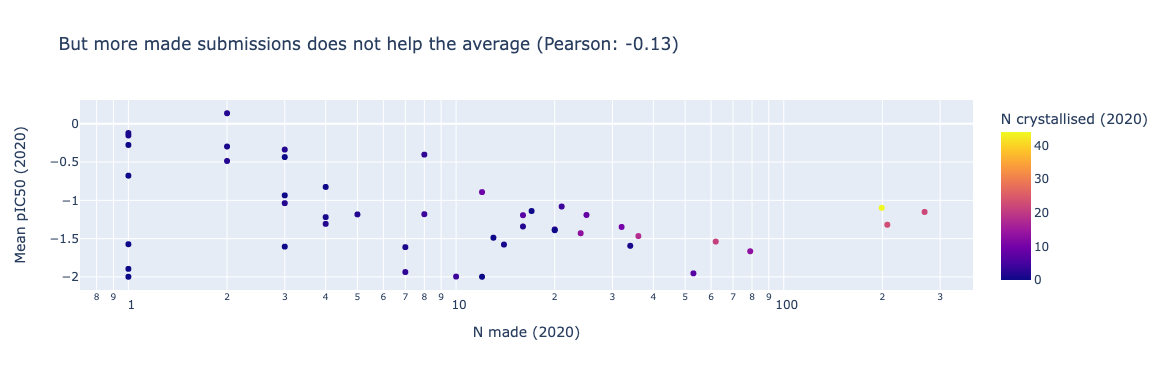

In [17]:
# IC50
import plotly.express as px
from scipy.stats import pearsonr

creators['name'] = creators.index
creators['Mean pIC50 (2020)'] = creators['Gmean IC50 (2020)'].apply(lambda v: -np.log10(v))

subbed = creators.loc[(creators['N made (2020)'].astype(bool)) & (~creators['Mean pIC50 (2020)'].isna())]
rho = pearsonr(subbed['N made (2020)'], subbed['Mean pIC50 (2020)'])
print(rho)
px.scatter(creators, 'N made (2020)', 'Mean pIC50 (2020)', color='N crystallised (2020)',
          hover_data=['name', 'N made (2020)', 'N made (2020)'],
          log_x=True,
          title=f'But more made submissions does not help the average (Pearson: {rho.statistic:.2f})'
          )

The lowest IC50s were achieved by the cabal-submitters. This was simply a result of their number of made compounds not quality.

## methods

In [6]:
moonshot['inferred_submission_month'] = moonshot.inferred_submission_date.apply(lambda d: d.month + 12 * (d.year -2020))

for j, i in enumerate(moonshot.index[moonshot.initial_screen]):
    moonshot.at[i, 'CID_group'] = f'DSi-poised-{j}'
    
# This set is some cryptic housekeeping by Aaron Morris
for  i in moonshot.index[moonshot.classified_method == 'INITIAL']:
    moonshot.at[i, 'classified_method'] = 'UNKNOWN'

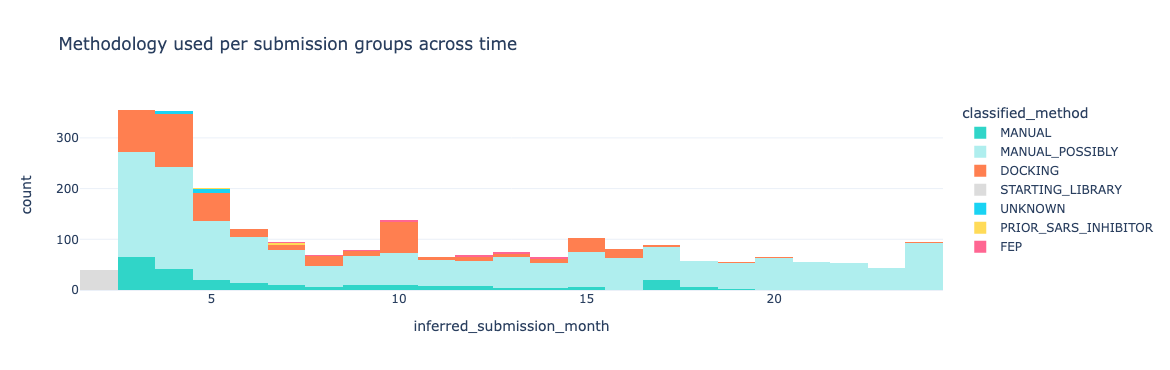

In [15]:
import plotly.express as px

fig = px.histogram(moonshot.drop_duplicates('CID_group'), 
                     'inferred_submission_month', 
                     color='classified_method',
                     color_discrete_map = {'DOCKING': '#ff7f50', 'MANUAL':'#30d5c8','MANUAL_POSSIBLY': '#afeeee',
                                           'PRIOR_SARS_INHIBITOR':'#ffdb58','STARTING_LIBRARY': 'gainsboro'},
                     title='Methodology used per submission groups across time',
                     template='plotly_white',
                    )
fig.write_image("methodology_time.svg", width=800, height=800, scale=2)
fig

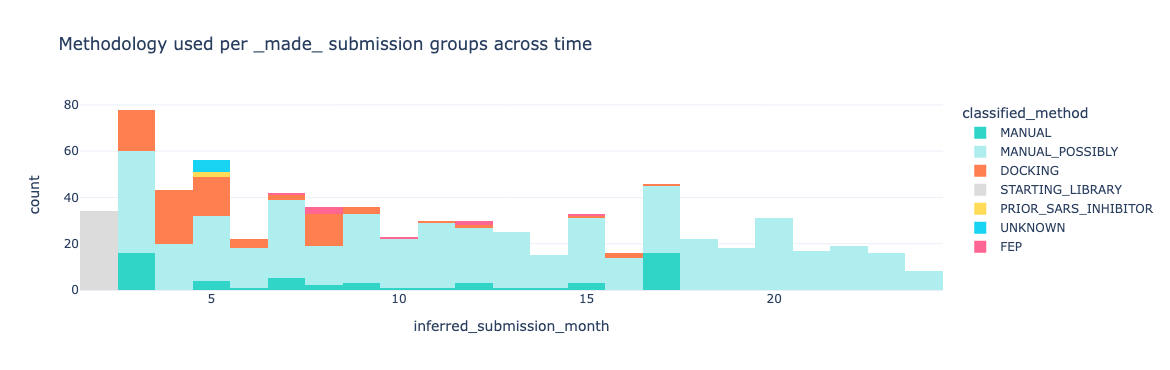

In [20]:
import plotly.express as px

fig = px.histogram(moonshot.loc[(moonshot.MADE)].drop_duplicates('CID_group'), 
                     'inferred_submission_month', 
                     color='classified_method',
                     color_discrete_map = {'DOCKING': '#ff7f50', 'MANUAL':'#30d5c8','MANUAL_POSSIBLY': '#afeeee',
                                           'PRIOR_SARS_INHIBITOR':'#ffdb58','STARTING_LIBRARY': 'gainsboro'},
                     title='Methodology used per _made_ submission groups across time',
                     template='plotly_white',
                    )
#fig.write_image("methodology_time.svg", width=800, height=800, scale=2)
fig

In [55]:
# These are extremely 'Lucky' to be picked if it were random...
creators = pivot_creators(moonshot)
lucky = creators.index[(creators['N made']/creators['N submissions'] > 0.5) & (creators['N made'] > 5)].values
moonshot['lucky_creator'] = moonshot.clean_creator.isin(lucky)

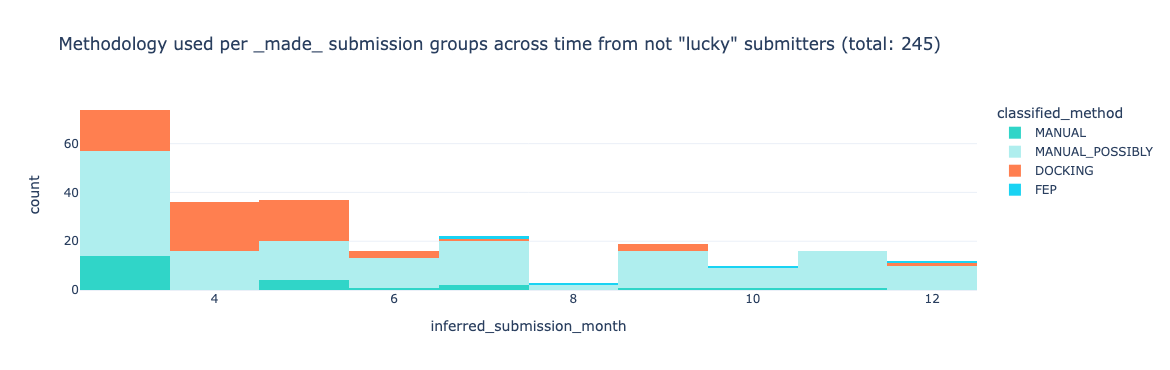

In [56]:
import plotly.express as px

date_cutoff = datetime(2021, 1, 1)
subbed = moonshot.loc[(moonshot.MADE) & (~moonshot.clean_creator.isin(lucky)) & (moonshot.inferred_submission_date < date_cutoff)].drop_duplicates('CID_group')

fig = px.histogram(subbed, 
                     'inferred_submission_month', 
                     color='classified_method',
                     color_discrete_map = {'DOCKING': '#ff7f50', 'MANUAL':'#30d5c8','MANUAL_POSSIBLY': '#afeeee',
                                           'PRIOR_SARS_INHIBITOR':'#ffdb58','STARTING_LIBRARY': 'gainsboro'},
                     title=f'Methodology used per _made_ submission groups across time from not "lucky" submitters (total: {len(subbed)})',
                     template='plotly_white',
                    )
#fig.write_image("methodology_time.svg", width=800, height=800, scale=2)
fig

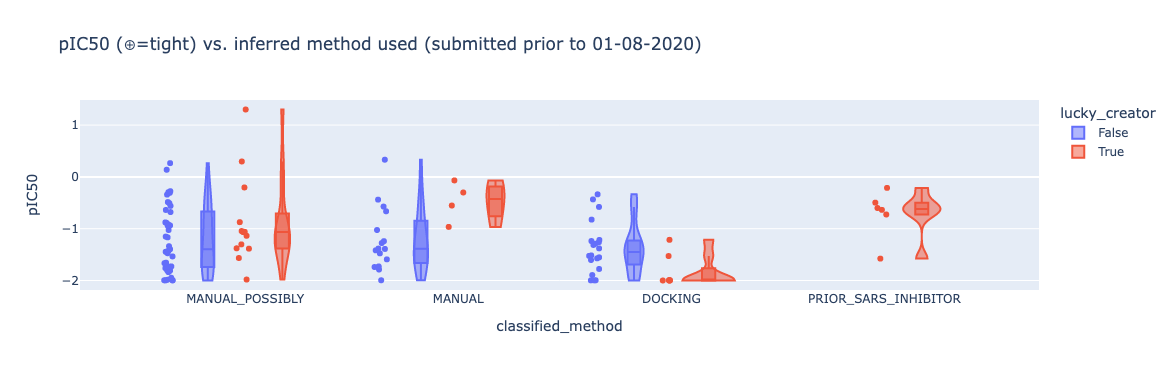

In [73]:
date_cutoff = datetime(2020, 8, 1)

subbed = moonshot.loc[~moonshot.classified_method.isin(['STARTING_LIBRARY', 'UNKNOWN']) & \
                      (moonshot.submission_date < date_cutoff) & (moonshot.shipment_date < date_cutoff)
                     ]
fig = px.violin(subbed,
                title=f'pIC50 ({chr(0x2295)}=tight) vs. inferred method used (submitted prior to {date_cutoff.strftime("%d-%m-%Y")})',
                y='pIC50', x='classified_method',
               color='lucky_creator',
               box=True,
               points='all')
fig.update_traces(spanmode = 'hard')
fig

In [80]:
subbed.classified_method.value_counts()

MANUAL_POSSIBLY         54
DOCKING                 28
MANUAL                  20
PRIOR_SARS_INHIBITOR     6
Name: classified_method, dtype: int64

In [76]:
pd.pivot_table(subbed, values='pIC50', columns='classified_method', index='lucky_creator', aggfunc='mean')

classified_method,DOCKING,MANUAL,MANUAL_POSSIBLY,PRIOR_SARS_INHIBITOR
lucky_creator,,,,
False,-1.365478,-1.212452,-1.202558,NaN
True,-1.841175,-0.471771,-0.877003,-0.70833


In [77]:
pd.pivot_table(subbed, values='pIC50', columns='classified_method', aggfunc='mean')

classified_method,DOCKING,MANUAL,MANUAL_POSSIBLY,PRIOR_SARS_INHIBITOR
pIC50,-1.501392,-1.064316,-1.124184,-0.70833


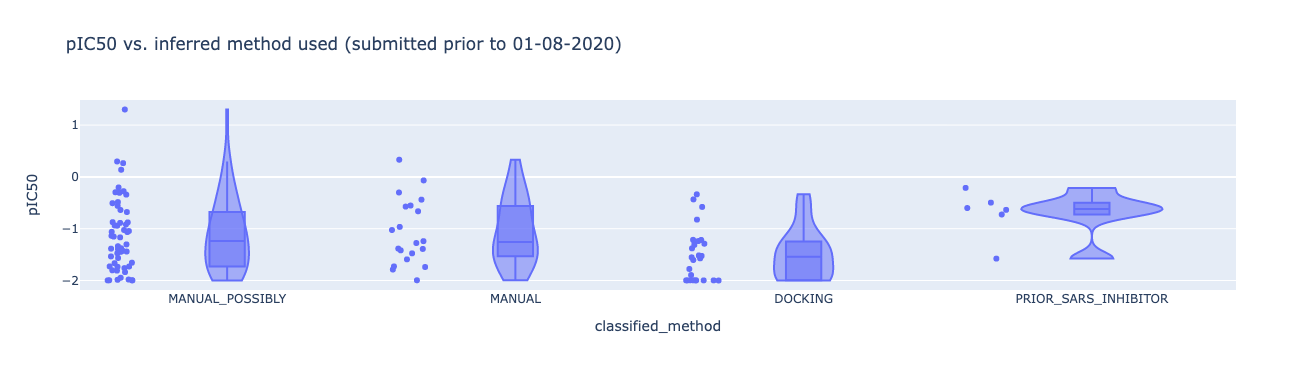

In [92]:
date_cutoff = datetime(2020, 8, 1)

subbed = moonshot.loc[~moonshot.classified_method.isin(['STARTING_LIBRARY', 'UNKNOWN']) & \
                      (moonshot.submission_date < date_cutoff) & (moonshot.shipment_date < date_cutoff)
                     ]

fig = px.violin(subbed,
                title=f'pIC50 vs. inferred method used (submitted prior to {date_cutoff.strftime("%d-%m-%Y")})',
                y='pIC50', x='classified_method',
               #color='lucky_creator',
               box=True,
               points='all')
fig.update_traces(spanmode = 'hard')
fig

/var/folders/27/cbp4jxn510947h64f6tvhyvr0000gp/T/ipykernel_7719/1197920892.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



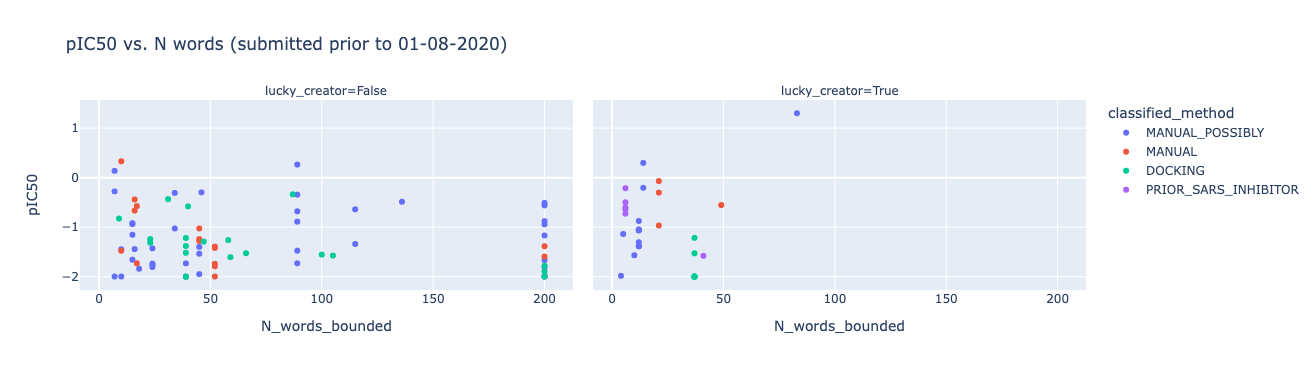

In [93]:
subbed['N_words_bounded'] = subbed.N_words.apply(lambda v: v if v < 200 else 200)

fig = px.scatter(subbed,
                title=f'pIC50 vs. N words (submitted prior to {date_cutoff.strftime("%d-%m-%Y")})',
                y='pIC50', x='N_words_bounded',
                 facet_col='lucky_creator',
               color='classified_method')
fig

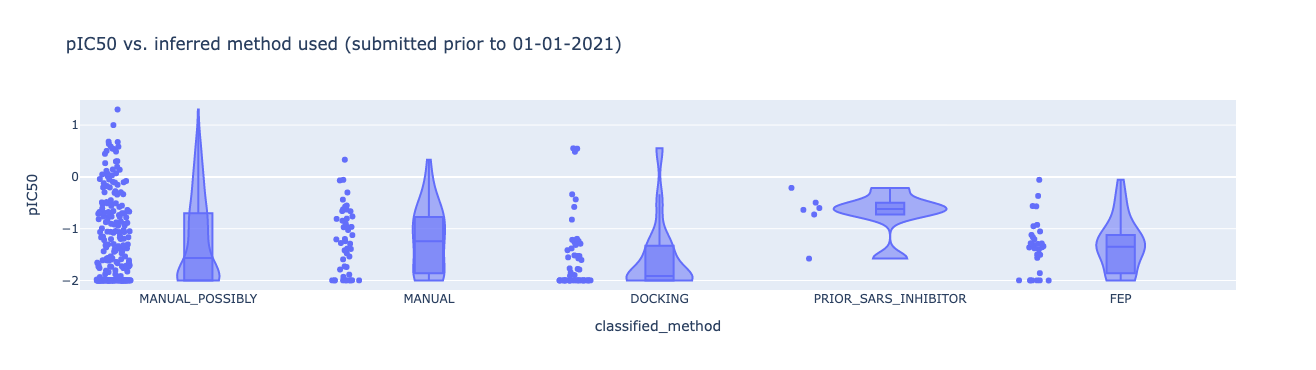

In [94]:
date_cutoff = datetime(2021, 1, 1)

subbed = moonshot.loc[~moonshot.classified_method.isin(['STARTING_LIBRARY', 'UNKNOWN']) & \
                      (moonshot.submission_date < date_cutoff) & (moonshot.shipment_date < date_cutoff)
                     ]

fig = px.violin(subbed,
                title=f'pIC50 vs. inferred method used (submitted prior to {date_cutoff.strftime("%d-%m-%Y")})',
                y='pIC50', x='classified_method',
               #color='lucky_creator',
               box=True,
               points='all')
fig.update_traces(spanmode = 'hard')
fig